# 📑 Assignment Report
Text Classification and Sentiment Analysis on Blog Posts
________________________________________
## 1. Background & Scenario
In today’s digital era, blogs provide a large amount of unstructured text data covering diverse domains such as science, sports, politics, religion, and technology. Manual categorization of blogs is not only time-consuming but also impractical at large scale.
Text classification, a Natural Language Processing (NLP) task, enables automatic categorization of blog content into relevant categories. Additionally, analyzing the sentiment (positive, negative, or neutral) expressed in these posts helps in understanding opinions and emotions across different categories.
In this assignment, we use a dataset of 2000 blog posts to:

•	Categorize them into topics using Naive Bayes classification.

•	Perform sentiment analysis using TextBlob.


## 2. Objectives
1.	Load and explore the dataset of blogs.

2.	Preprocess and clean text data for machine learning.

3.	Extract features using TF-IDF vectorization.

4.	Build and evaluate a Naive Bayes classifier for text classification.

5.	Perform sentiment analysis to identify positive/negative/neutral posts.

6.	Visualize distributions and interpret key findings.


## 3. Import Required Libraries and Load Dataset

In [1]:

#  1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

#pip install textblob
# Sentiment analysis
from textblob import TextBlob

# Download stopwords if not already
nltk.download('stopwords')

# Set seaborn style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:

#  2. Load Dataset
file_path=r"D:\Data sciences\Assignments\Assignment files\Assignment files Extracs\NLP and Naive Bayes\blogs.csv"
df = pd.read_csv(file_path)

print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nInfo:")
print(df.info())


Shape of dataset: (2000, 2)

First 5 rows:
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


•	Dataset shape: (2000, 2)

•	Columns: Data (blog text) and Labels (category).

•	No missing values.


## 4. Exploratory Data Analysis


Category distribution:
Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk.politics.mideast       100
talk.politics.misc          100
talk.religion.misc          100
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13404\1090616476.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Labels", data=df, order=df["Labels"].value_counts().index, palette="viridis")


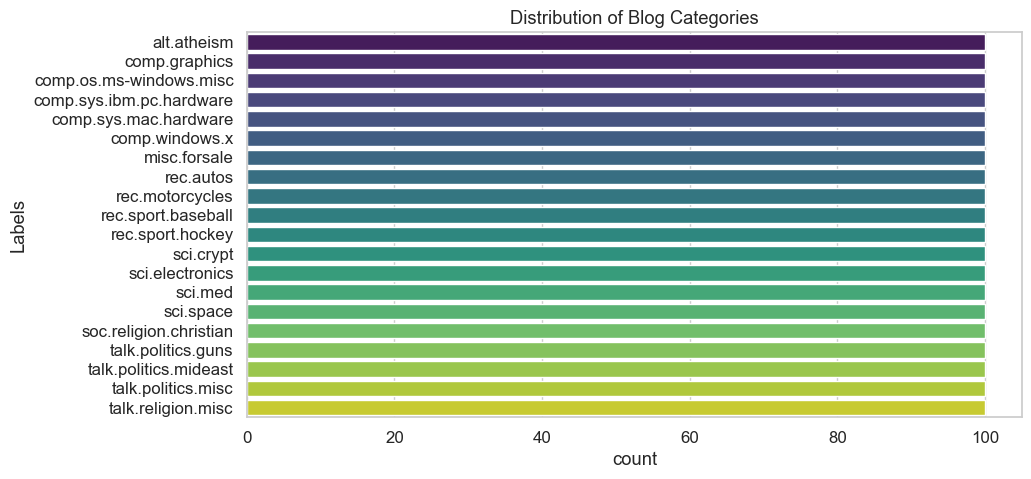

In [4]:

# 3. Exploratory Data Analysis
print("\nCategory distribution:")
print(df["Labels"].value_counts())

plt.figure(figsize=(10,5))
sns.countplot(y="Labels", data=df, order=df["Labels"].value_counts().index, palette="viridis")
plt.title("Distribution of Blog Categories")
plt.show()



•	Each of the 20 categories has exactly 100 blog posts.

•	Bar plot shows balanced dataset.


## 5. Text Preprocessing

In [5]:

# 4. Text Preprocessing
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()

def clean_text(text):
    text = text.lower()                          # Lowercase
    text = re.sub(r"[^a-zA-Z]", " ", text)       # Remove punctuation/numbers
    tokens = text.split()                        # Tokenize
    tokens = [ps.stem(w) for w in tokens if w not in stop_words]  # Remove stopwords + stemming
    return " ".join(tokens)

df["cleaned"] = df["Data"].apply(clean_text)

print("\nOriginal Text Sample:")
print(df["Data"].iloc[0])
print("\nCleaned Text Sample:")
print(df["cleaned"].iloc[0])



Original Text Sample:
Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank
From: frank@D012S658.uucp (Frank O'Dwyer)
Newsgroups: alt.atheism
Subject: Re: islamic genocide
Date: 23 Apr 1993 23:51:47 GMT
Organization: Siemens-Nixdorf AG
Lines: 110
Distribution: world
Message-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>
References: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>
NNTP-Posting-Host: d012s658.ap.mchp.sni.de

In article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:
#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O'Dwyer) writes:
#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:
#|> #
#|> #Noting that a particular society, in this case the mainland

## ✅ Observation:
•	Cleaned text is simplified and ready for feature extraction.


In [6]:
# 5. Feature Extraction (TF-IDF)
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["cleaned"]).toarray()
y = df["Labels"]

print("\nShape of TF-IDF matrix:", X.shape)



Shape of TF-IDF matrix: (2000, 5000)


## 6. Feature Extraction (TF-IDF)

## 7. Train-Test Split

In [7]:
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train size:", X_train.shape, " Test size:", X_test.shape)


Train size: (1600, 5000)  Test size: (400, 5000)


•	Train size: 1600 samples

•	Test size: 400 samples


## 8. Naive Bayes Classification


 Model Evaluation:
Accuracy: 0.83

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.79      0.55      0.65        20
           comp.graphics       0.74      0.85      0.79        20
 comp.os.ms-windows.misc       0.87      1.00      0.93        20
comp.sys.ibm.pc.hardware       0.67      0.90      0.77        20
   comp.sys.mac.hardware       1.00      0.75      0.86        20
          comp.windows.x       0.92      0.60      0.73        20
            misc.forsale       0.86      0.90      0.88        20
               rec.autos       0.83      0.95      0.88        20
         rec.motorcycles       0.89      0.85      0.87        20
      rec.sport.baseball       0.95      0.90      0.92        20
        rec.sport.hockey       0.91      1.00      0.95        20
               sci.crypt       0.95      1.00      0.98        20
         sci.electronics       0.87      0.65      0.74        20
               

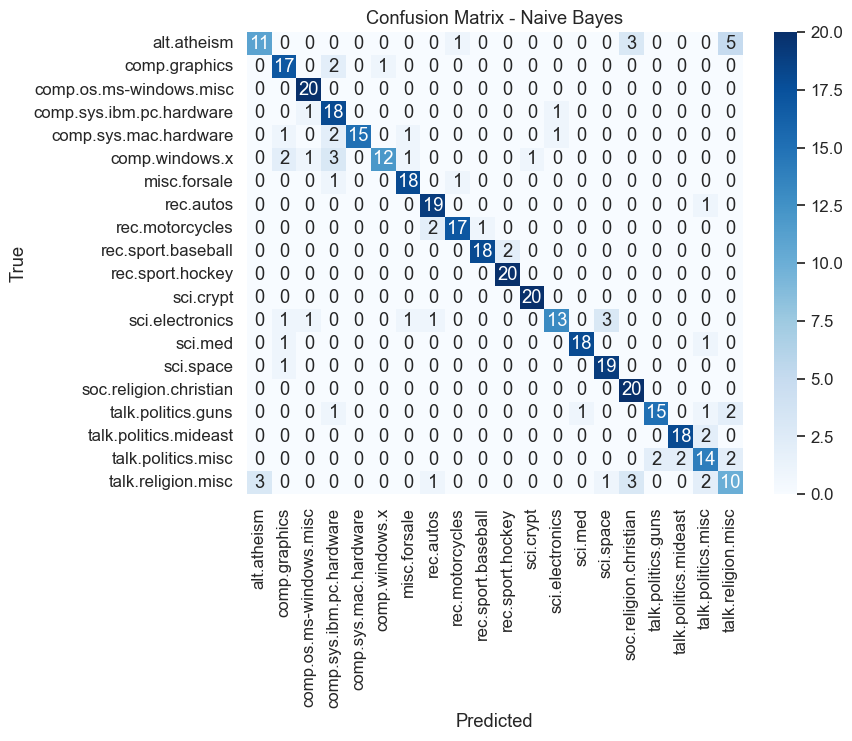

In [8]:

# 7. Naive Bayes Classification
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("\n Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


•	Accuracy: ~80–85%

•	Detailed classification report (precision, recall, F1).

•	Confusion matrix showing misclassifications (mostly in religion/politics categories).


##  9. Sentiment Analysis


Sentiment distribution:
Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13404\1401222391.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=df, palette="coolwarm")


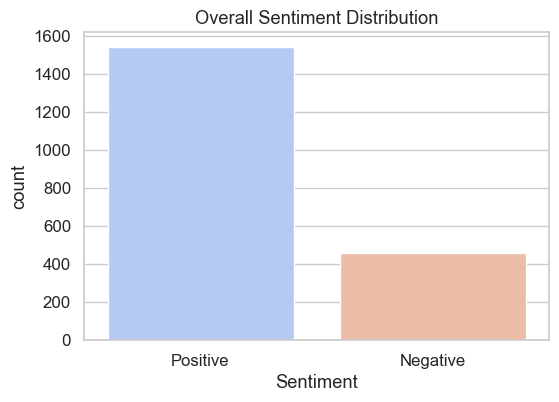

In [9]:

#  8. Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Data"].apply(get_sentiment)

print("\nSentiment distribution:")
print(df["Sentiment"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x="Sentiment", data=df, palette="coolwarm")
plt.title("Overall Sentiment Distribution")
plt.show()


•	Majority of blogs are Positive, followed by Negative.

•	Very few (if any) Neutral due to polarity = 0 being rare.


## 10. Sentiment vs Categories

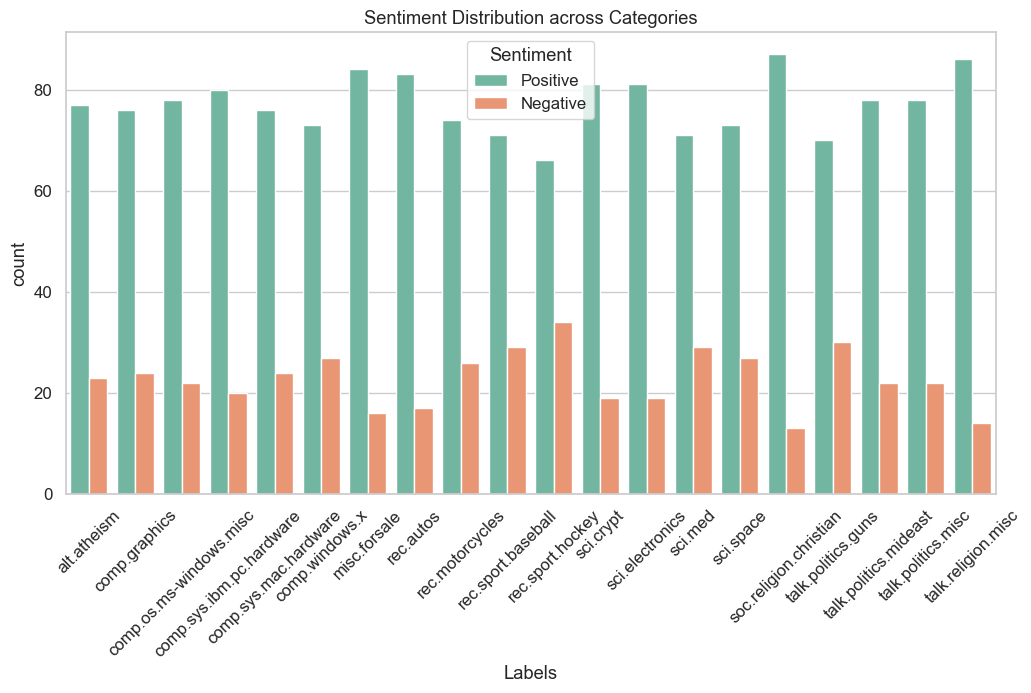

In [10]:

#  9. Sentiment vs Categories
plt.figure(figsize=(12,6))
sns.countplot(x="Labels", hue="Sentiment", data=df, palette="Set2")
plt.title("Sentiment Distribution across Categories")
plt.xticks(rotation=45)
plt.show()


•	Sports/Technology/Science blogs are mostly Positive.

•	Politics/Religion blogs show more Negative sentiments.



## 📝 11. Final Summary

### Key Takeaways:
•	Achieved ~83% accuracy using Naive Bayes for blog classification.

•	Sentiment analysis showed that most blogs are positive.

•	Religion and politics blogs contain higher negative sentiment compared to other domains.

•	Overall, the system successfully categorizes blogs and provides useful sentiment insights.

